In [99]:
library("ggplot2")
# "settings": { "notebook.output.textLineLimit": 500 }

## ES 1

In [1]:
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
x <- c(15.58, 15.9, 16, 16.1, 16.2)

df <- data.frame(p1,p2,x )

Exp_val_p1 <- sum(p1*x)
Exp_val_p1

Exp_val_p2 <- sum(p2*x)
Exp_val_p2

var_p1 <- sum((p1*x)^2) - Exp_val_p1^2
var_p2 <- sum((p2*x)^2) - Exp_val_p1^2



[1] 15.959

[1] 15.9622

## es 2

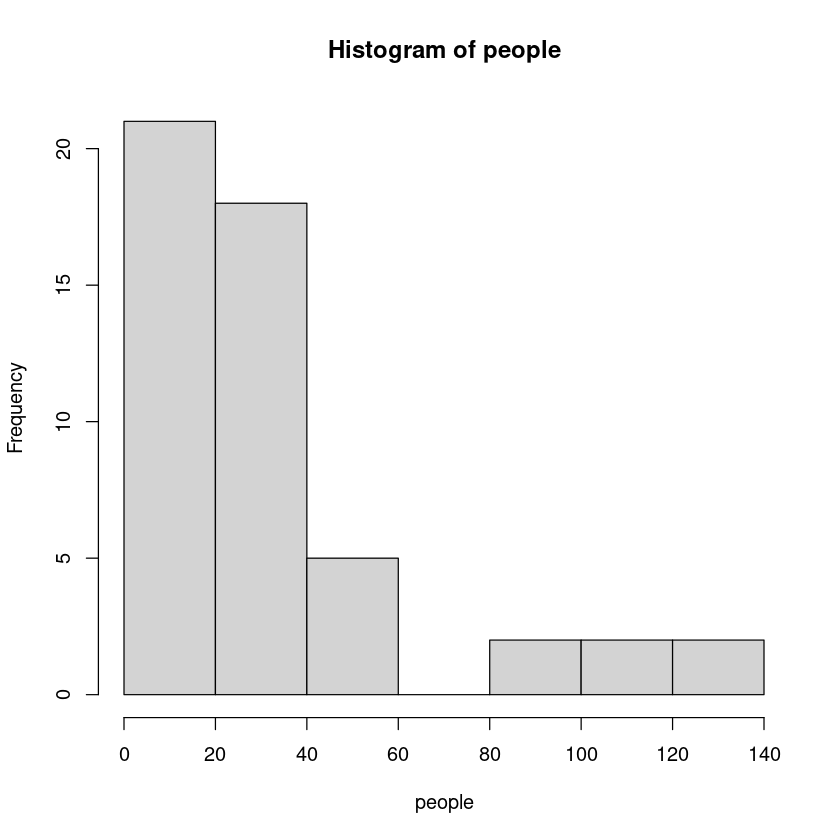

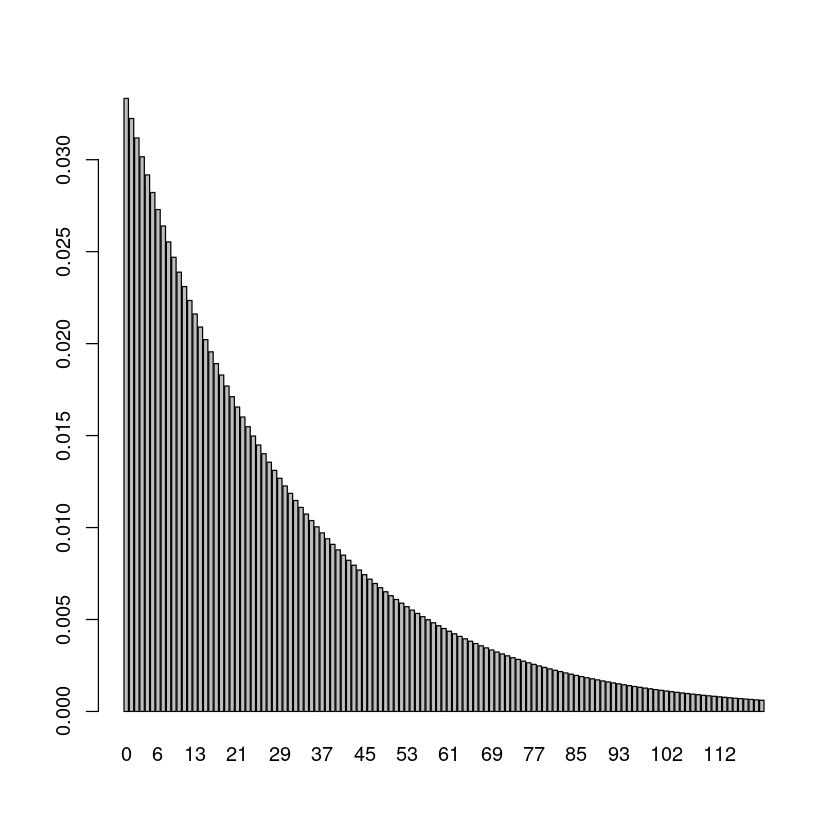

In [2]:
rate <- 1/30

people <- rexp(50, rate)
hist(people, breaks = )

t <- seq(0,120,1)
p <- dexp(t, rate)
barplot(p, names = t)

In [3]:
# P(X<10 min) 
sum(p[1:10])
E <- 1/rate
var <- 1/(rate^2)

cat("The expectation value form definition =",E,"\n")
# var
cat("The mean value fo simulation =",mean(people),"\n")

#expected value from the pdf --> integral of the pdf between 0,1

# e_pdf

pdf <- function(x,r) {
    return (r * exp(-r*x))
}

x <- 1:1000
e_pdf <- sum(x*pdf(x, rate))

cat("The expected value from pdf =",e_pdf,"\n")

cat("The probability of wating more than 1 hour is = ",(1-sum(p[1:60])))



[1] 0.2882194

The expectation value form definition = 30 
The mean value fo simulation = 32.25881 
The expected value from pdf = 29.99722 
The probability of wating more than 1 hour is =  0.1208441

## es3

In [4]:
l <- 1/3
pag <- seq(1,10,1) 
N <- function(n, t, l){
    P <- ( ((l*t)^n) * exp(-l*t)) / factorial(n)
    return(P)
}
#probabillity of having 2 errors after 2 pages
N(2, 2, l)


[1] 0.1140927

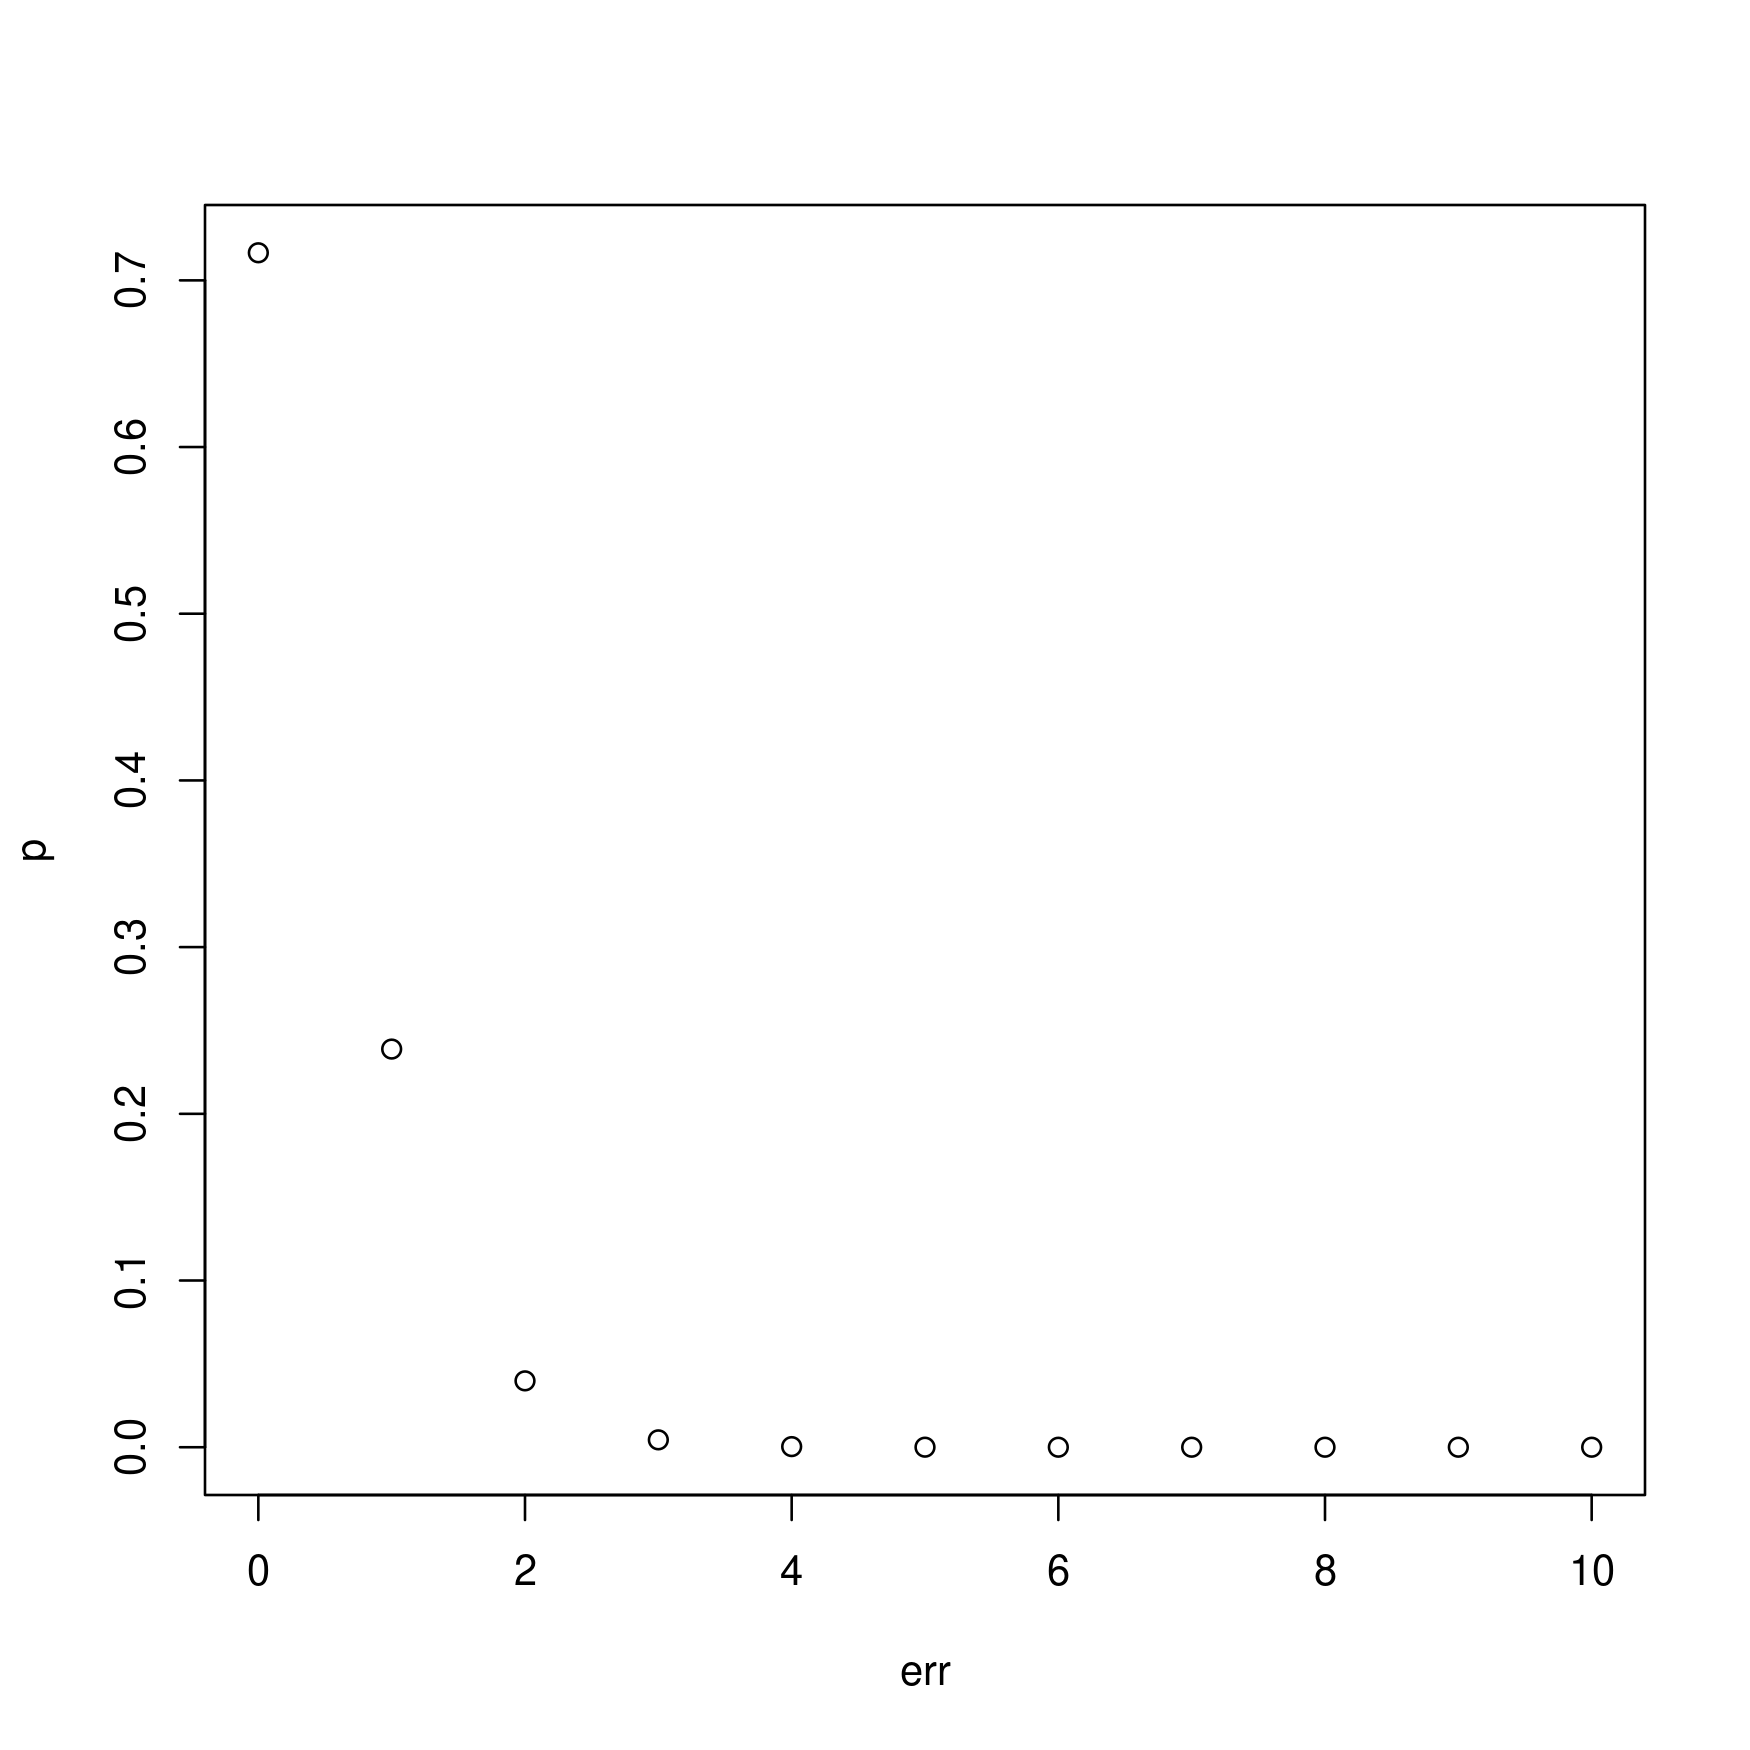

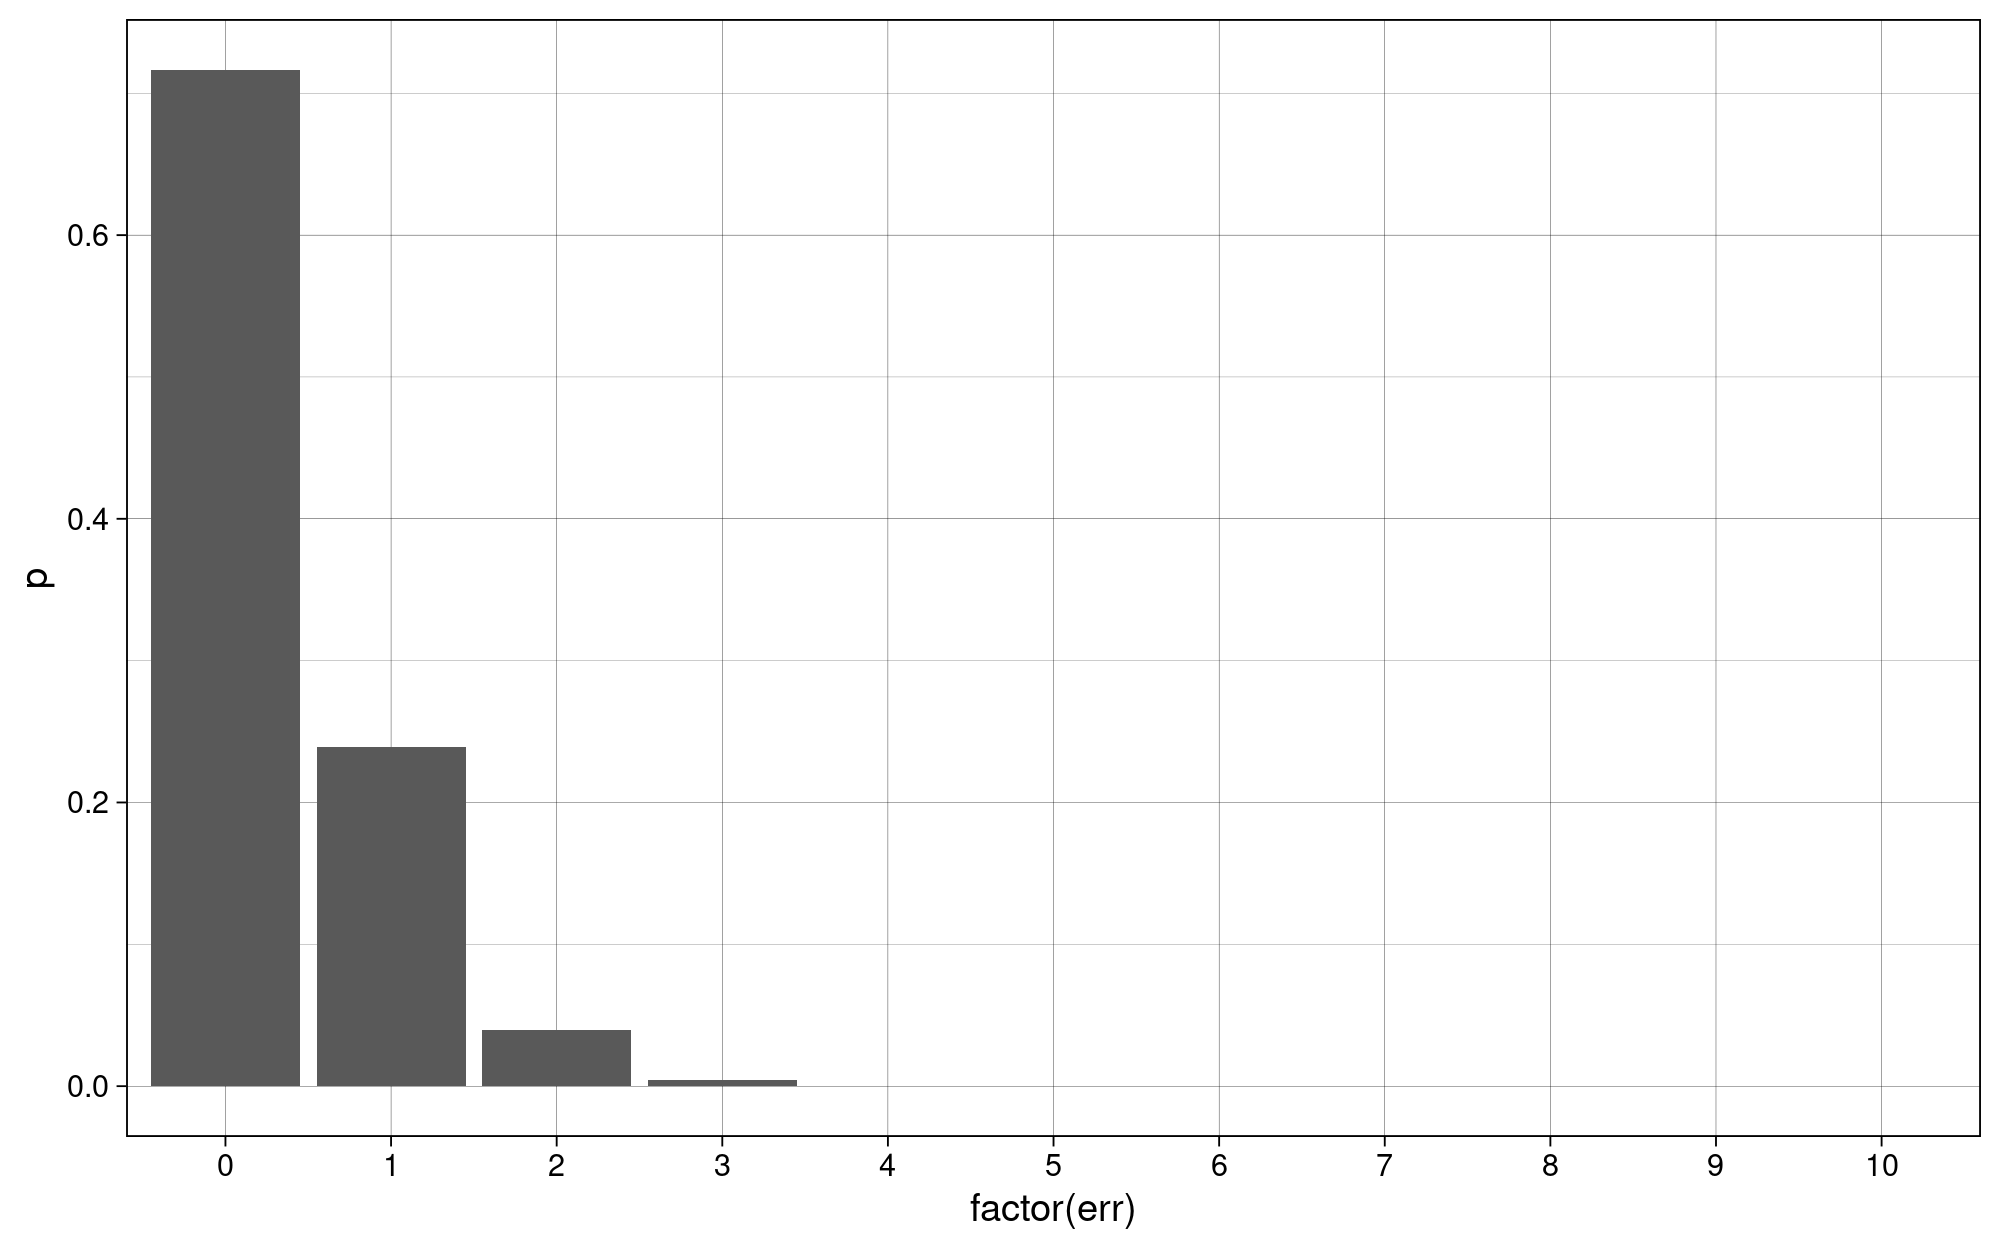

In [107]:
rate <- 1/3
err <- (0:10)
p <- dpois(err, lambda=rate)
# plot(err, p)

df_p <- data.frame(err,p)
d_plot <- ggplot(df_p, aes(x=factor(err), y=p )) +
    geom_bar(stat='identity')+
    theme_linedraw()
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 250)

d_plot


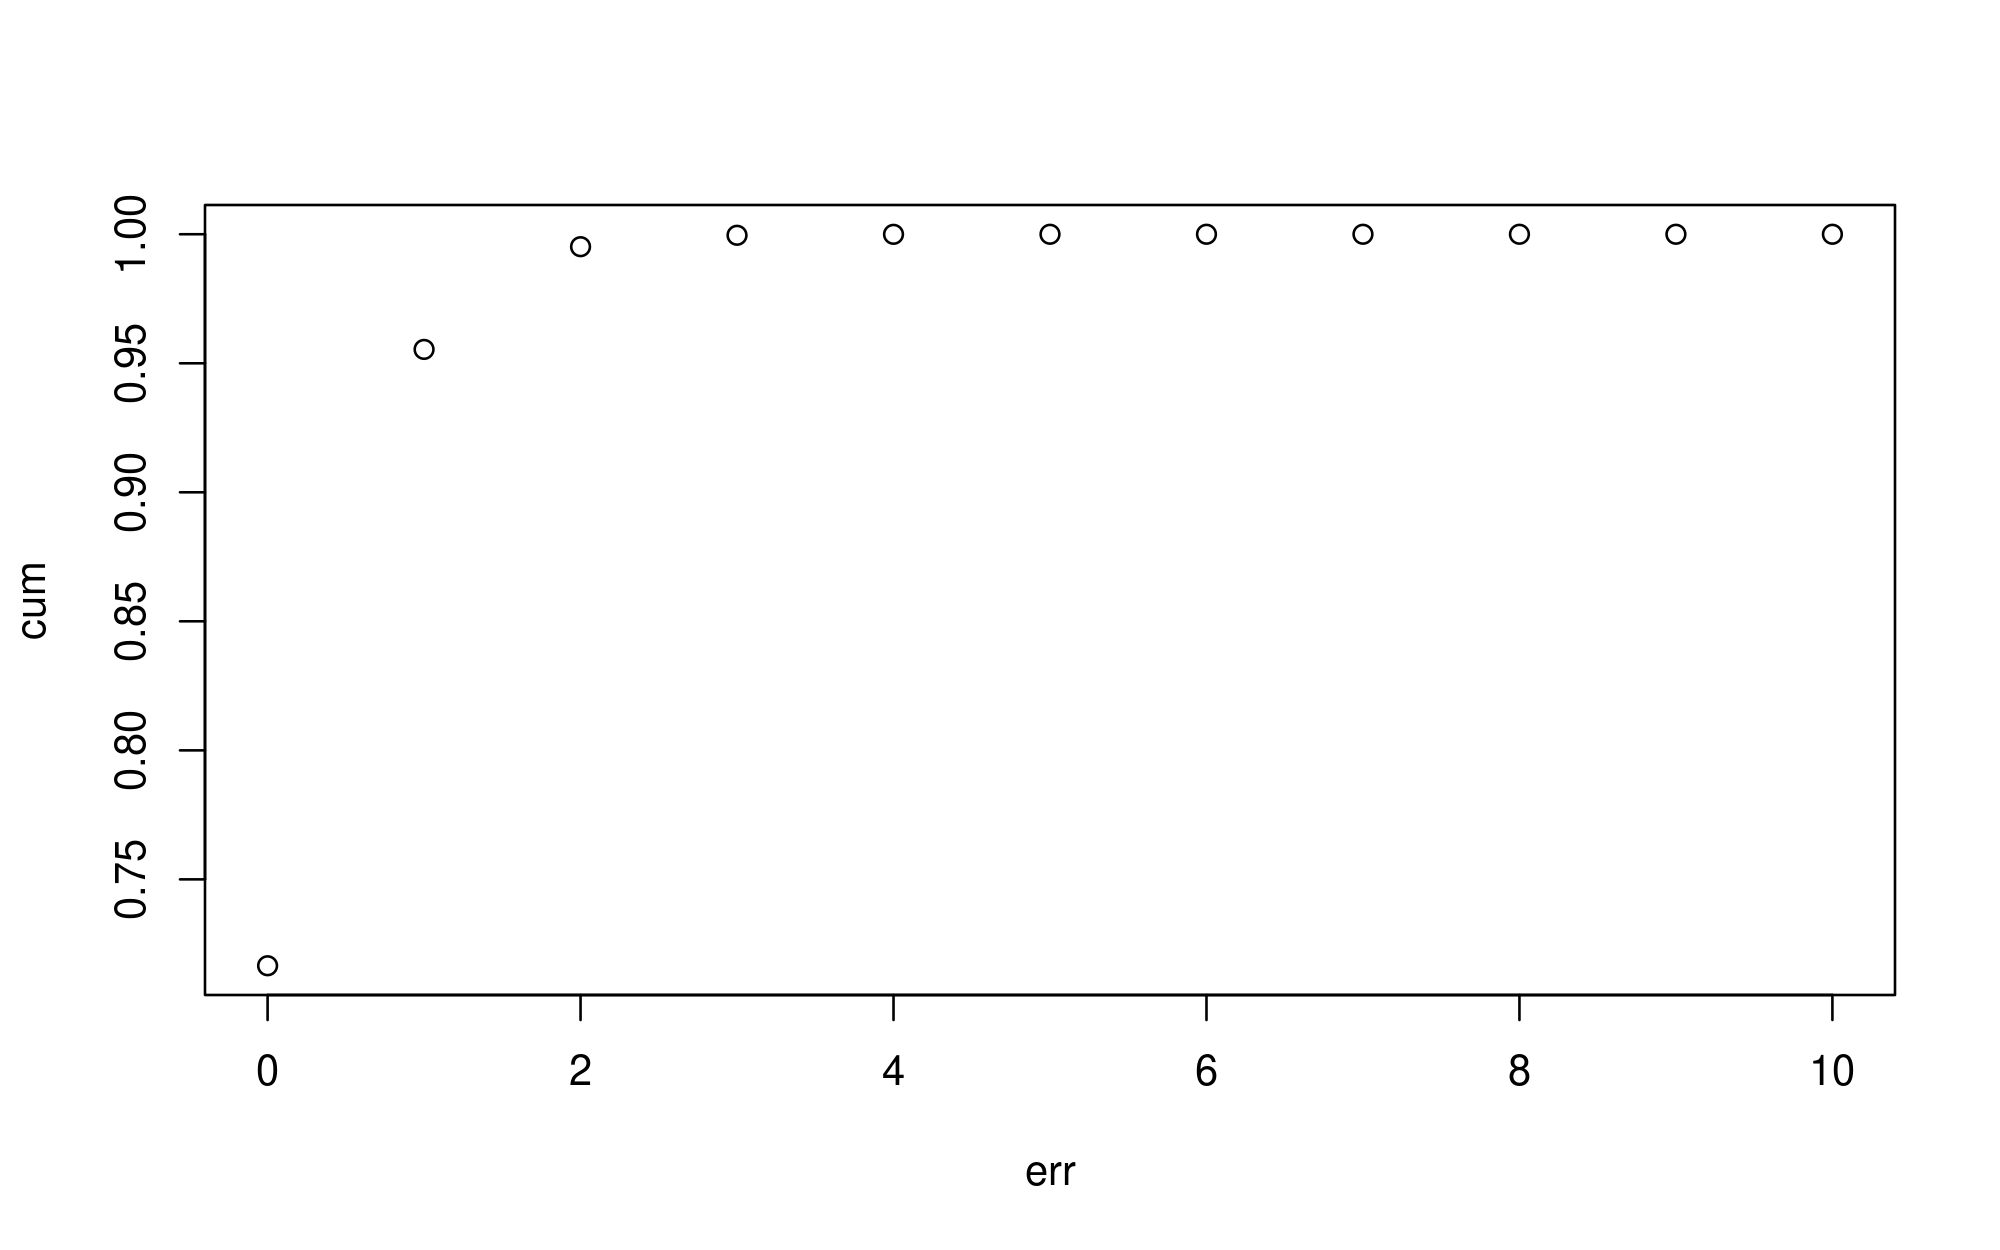

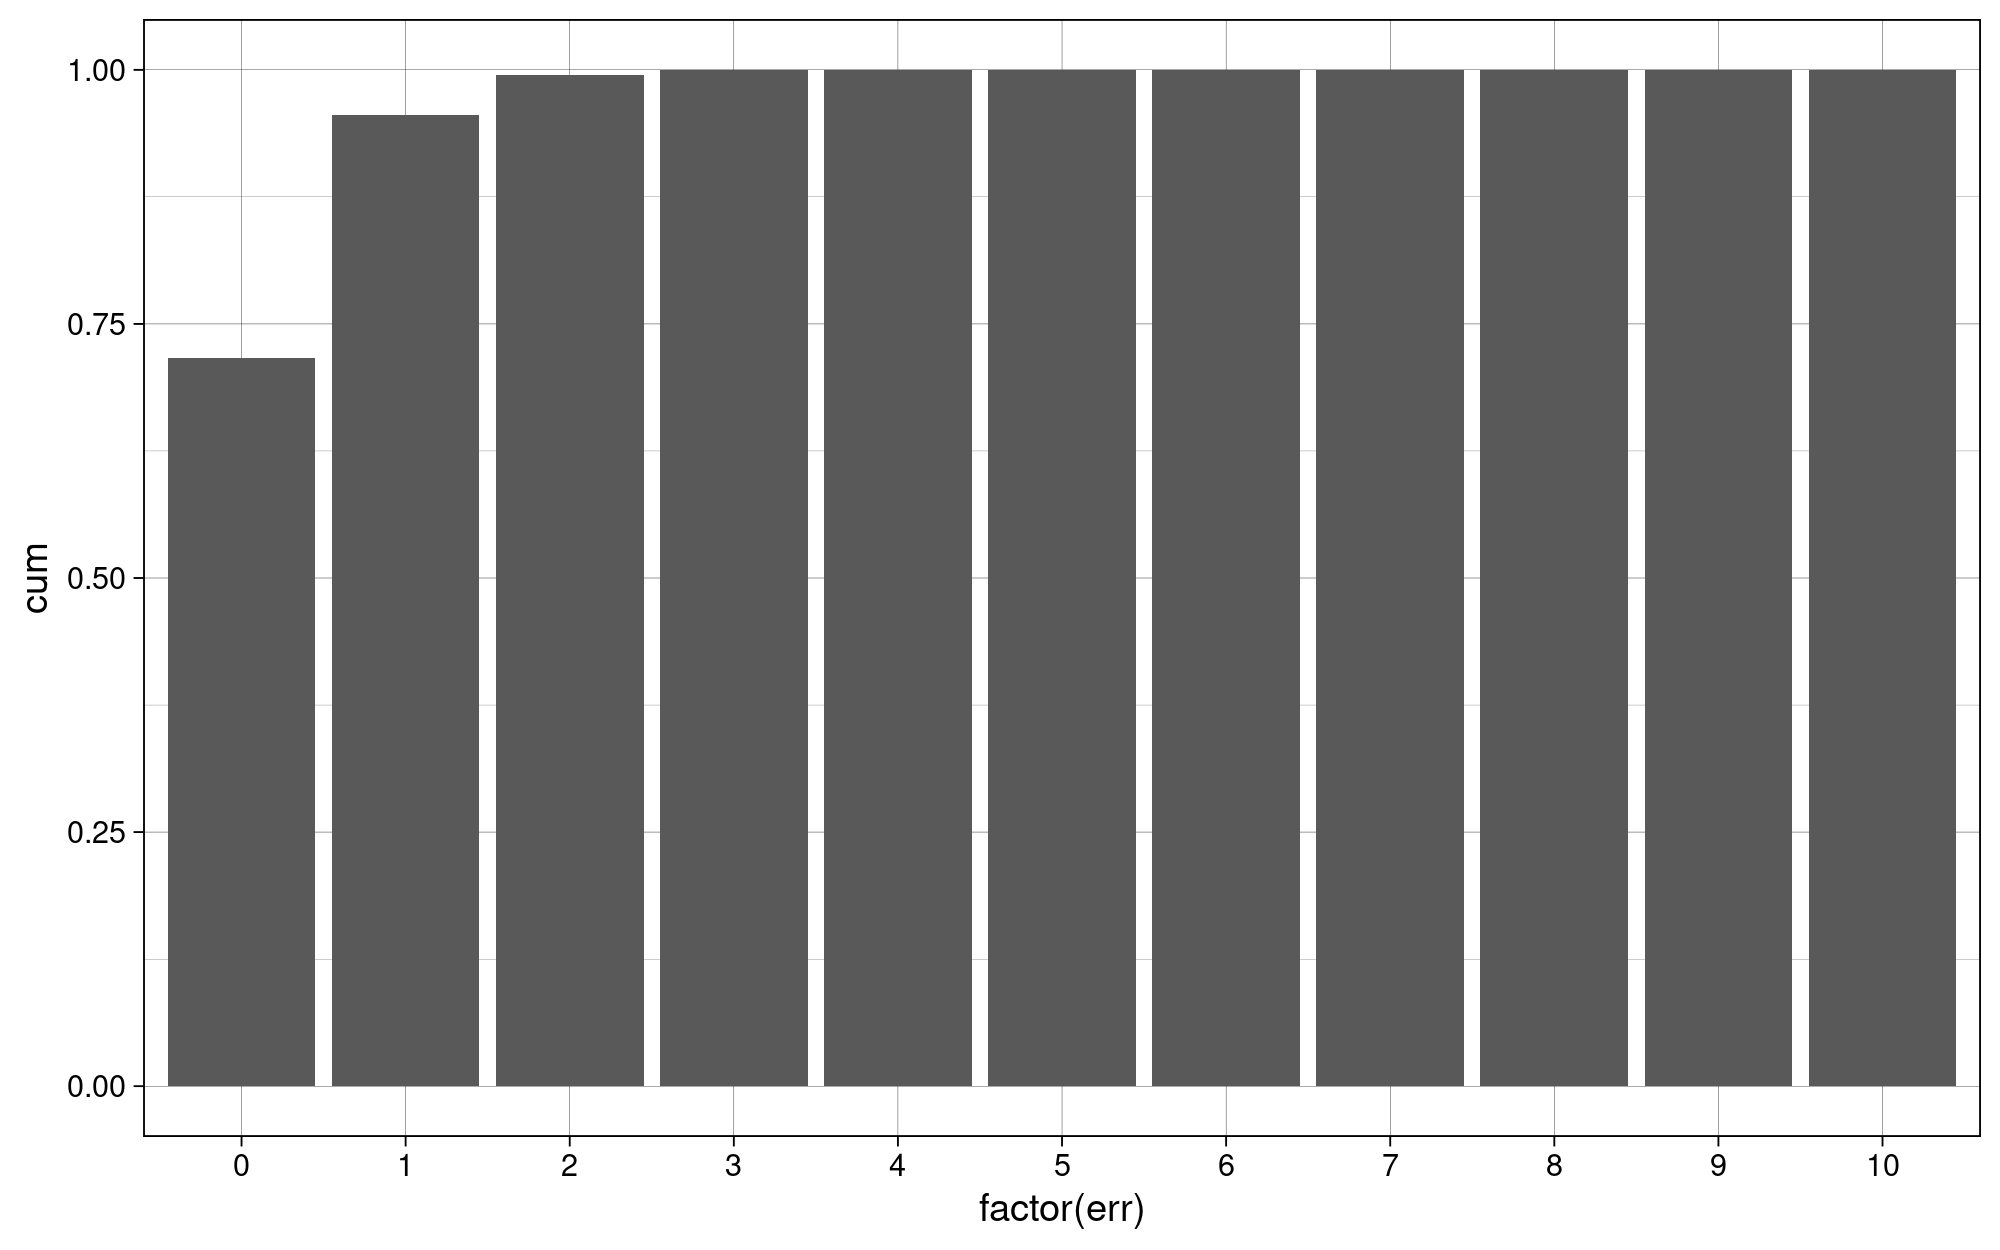

In [108]:
cum <- ppois(err, rate)
plot(err, cum)

df_c <- data.frame(err, cum )
c_plot <- ggplot(df_c, aes(x=factor(err), y=cum )) +
    geom_bar(stat='identity')+
    theme_linedraw()
c_plot

In [65]:
cat("the probability that there is at least one error on a specific page of the book is:",
    (1-p[1])*100,"%")

the probability that there is at least one error on a specific page of the book is: 28.34687 %

## es4

In [6]:
#geometric distribution(?) or Poisson
#ci sono 4 assi in tutto il mazzo quindi 4/52
#calcolare la prob che c'è un evento dopo almeno 10 tentativi
#P(x<10)

p_i <- 1/13

N(1,10,p_i)
dbinom(x=0, size=9, prob=1/13)


[1] 0.356438

[1] 0.4865652

## es5

In [7]:
f<- function(x){
    return(x^2)
}
integrate(f,1,2)

2.333333 with absolute error < 2.6e-14

In [8]:
# defining the function
f <- function(t,c=1) {
    if(t>1 & t<2){
        return( c*(t-1)*(2-t) )
    }
    else{
        return( 0 )
    }
}

integrate(Vectorize(f), lower=1, upper=2)



0.1666667 with absolute error < 1.9e-15

In [9]:
# the integral of f must be equal to 1

c <- seq(-100,100,0.5)

for (i in c){
    f <- function(t,c=i) {
        if(t>1 & t<2){
            return( c*(t-1)*(2-t) )
        }
        else{
            return( 0 )
        }
    }
    if(integrate(Vectorize(f), lower=1, upper=2)$value==1){
        cat("Integrale di pdf = 1 with c =",i)
    }
    
}
#analitically the found value of c is c=6

Integrale di pdf = 1 with c = 6

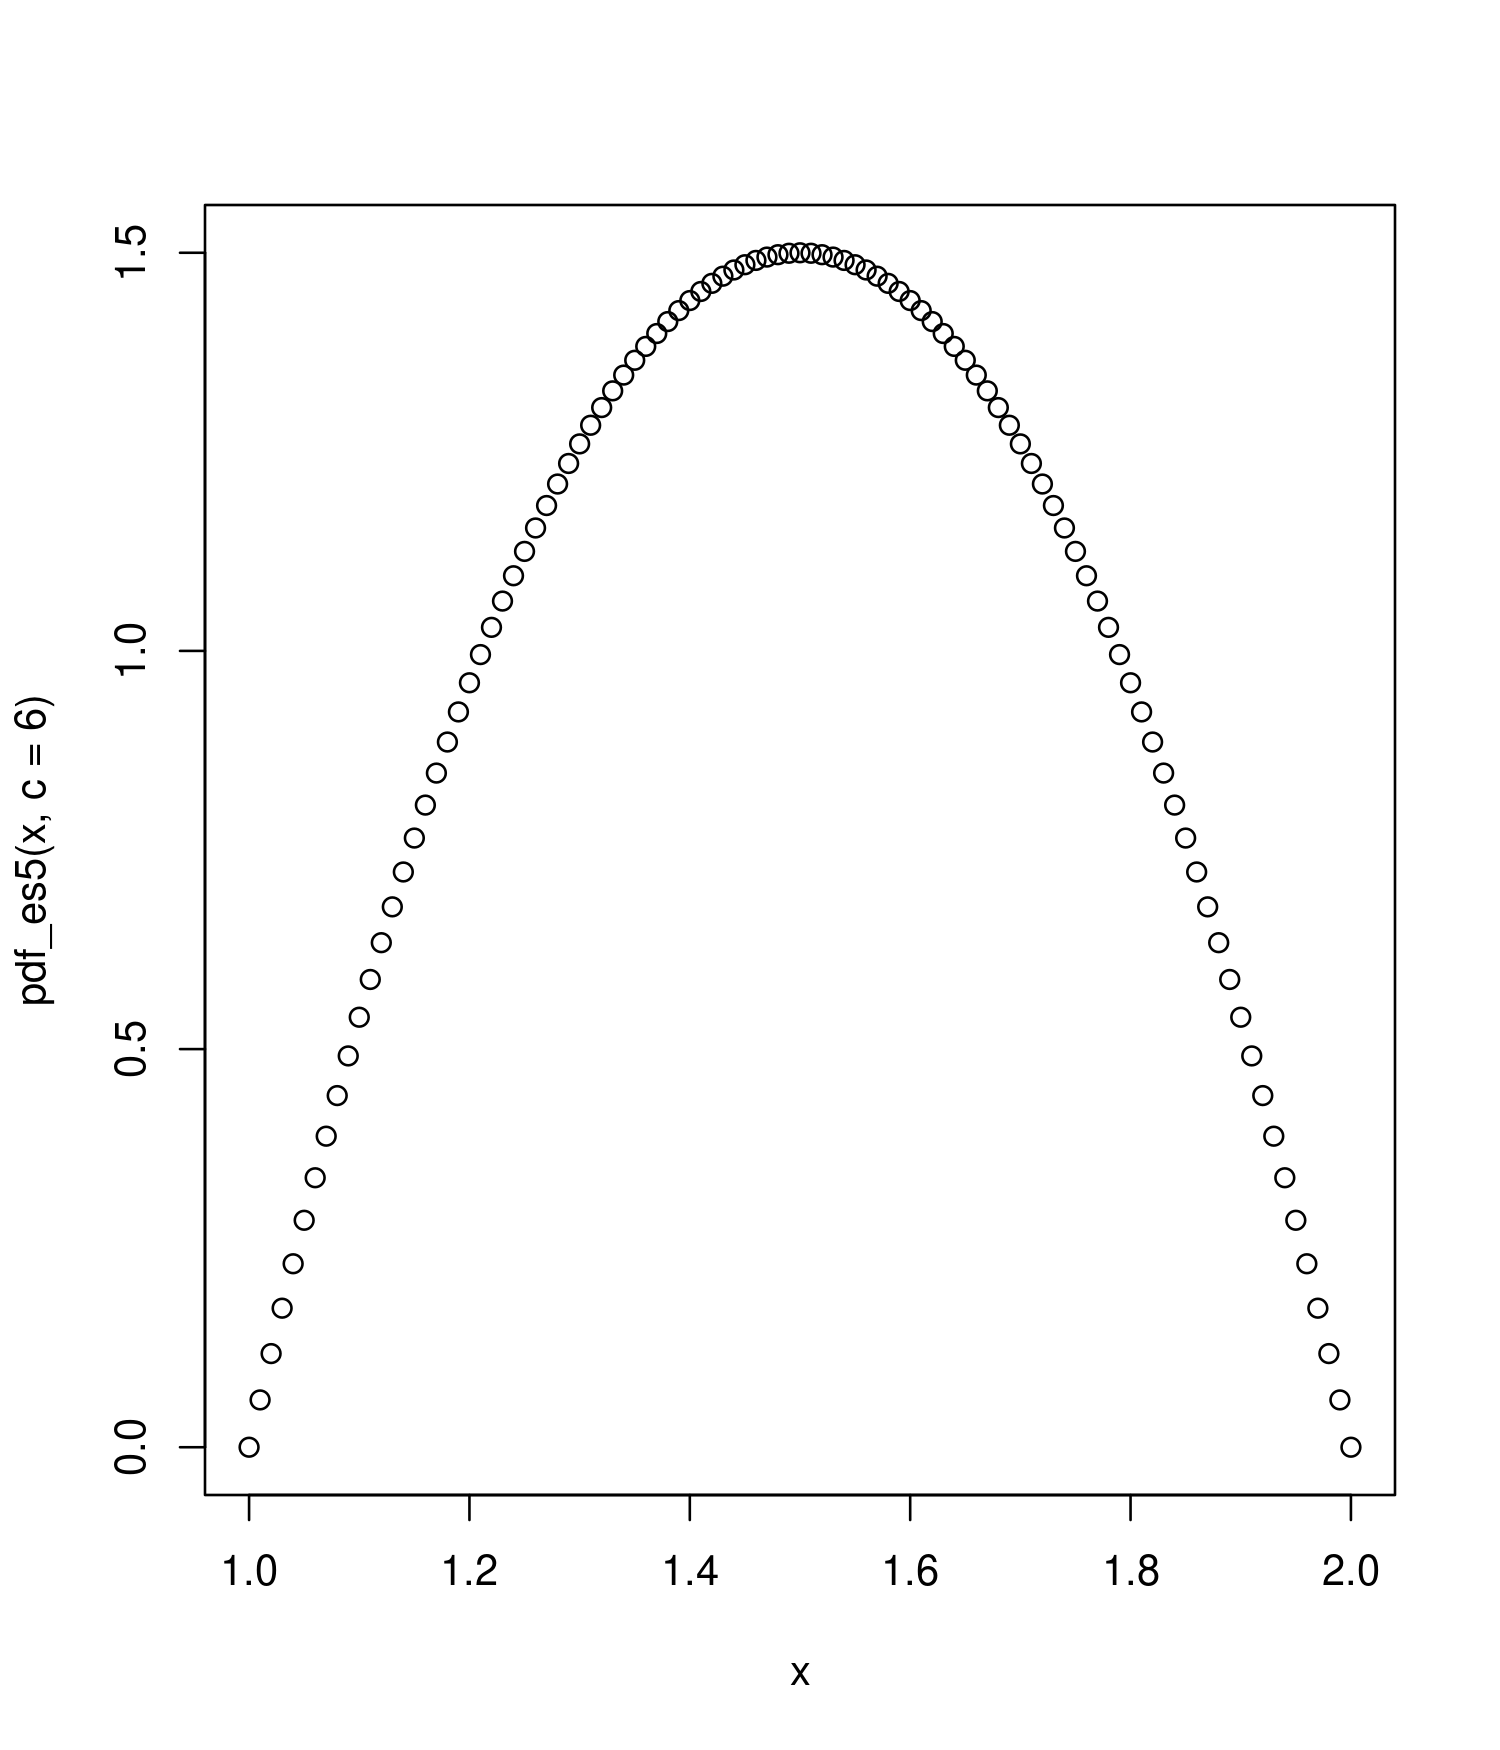

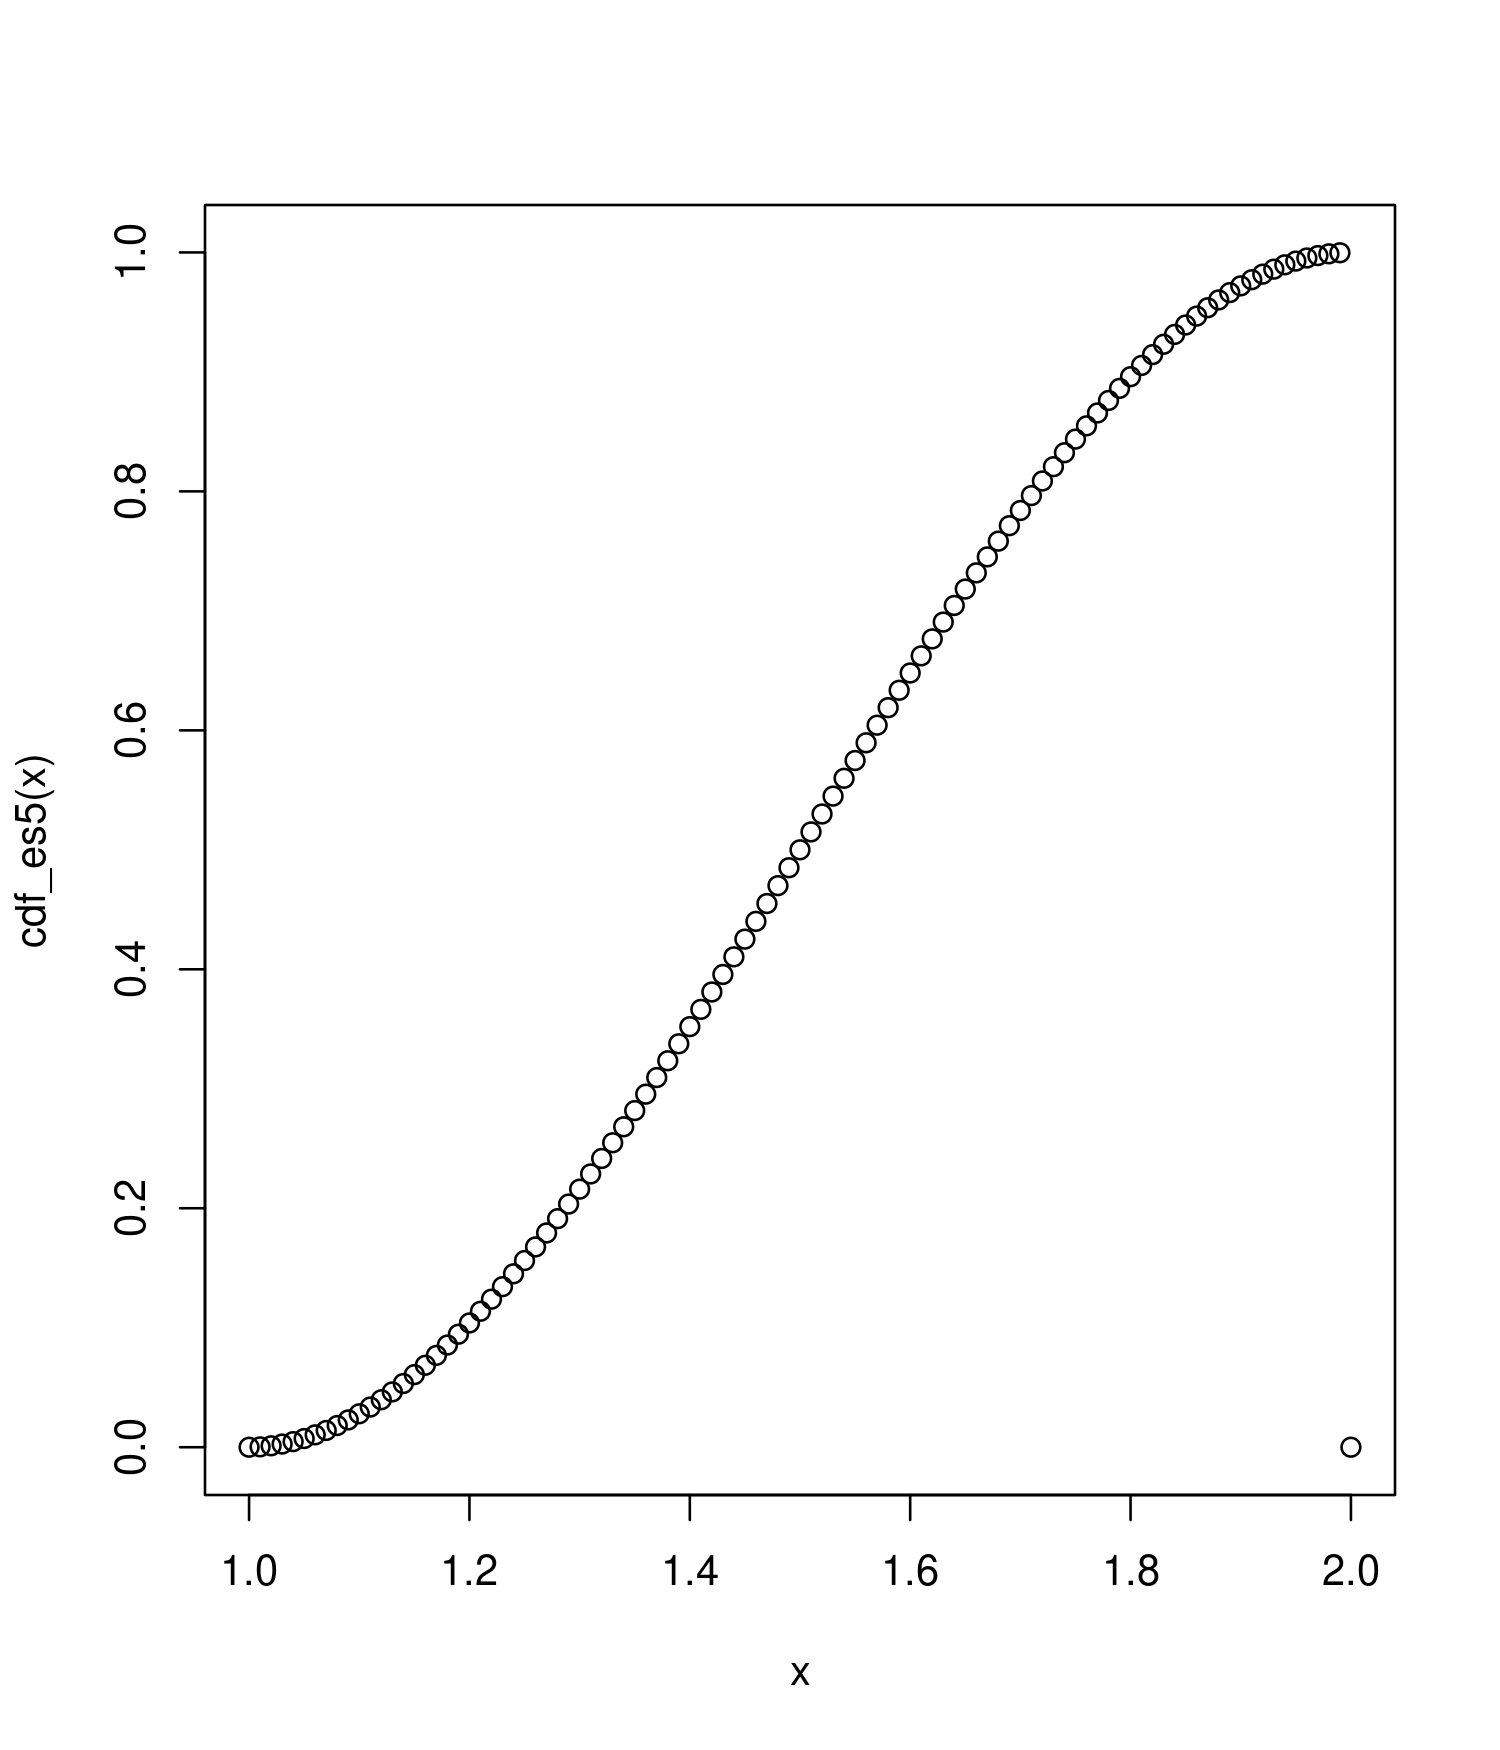

In [116]:
options(repr.plot.width = 6, repr.plot.height = 7, repr.plot.res = 250)

pdf_es5 <- function(t,c=6){
    ifelse(t>1 & t<2 , c*(t-1)*(2-t), 0 )
}   
x <- seq(1,2,0.01)

plot(x,pdf_es5(x,c=6))


cdf_es5 <- function(t,c=6){
    ifelse(t>1 & t<2 , 
    c*(-1/3 * x^3 + 3/2 * x^2 - 2*x + 5/6),
    0 )
    # if (t<=1) {0}
    # else if(t>1 & t<2) {c*(-1/3 * x^3 + 3/2 * x^2 - 2*x + 5/6)}
    # else {1}
}

plot(x,cdf_es5(x))

In [36]:
# quantile function is the inverse of the cdf so we have to invert cdf_es5
# sustituting c=6
qdf_es5 <- function(q) {
    
    f <- abs(polyroot( c(5, -12, 9, -2 ) ) )
    f <- f[f>=1]
    f <- f[f<=2]
    return(f)
}

qdf_es5(1)
# plot(x, qdf_es5(x))

[1] 1

In [11]:
install.packages("GoFKernel")
library("GoFKernel")

Installing package into ‘/home/pietro/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



In [12]:
#quantile function is the inverse of the cumulative function
lower <- min(F(x))
upper <- max(F(x))

Q <- inverse(F, lower,upper)

inverse <- function(f, lower, upper){
  function(y){
    uniroot(function(x){f(x) - y}, lower = lower, upper = upper,)[1]
  }
}
# Q <- inverse(F, 0.1, 100)


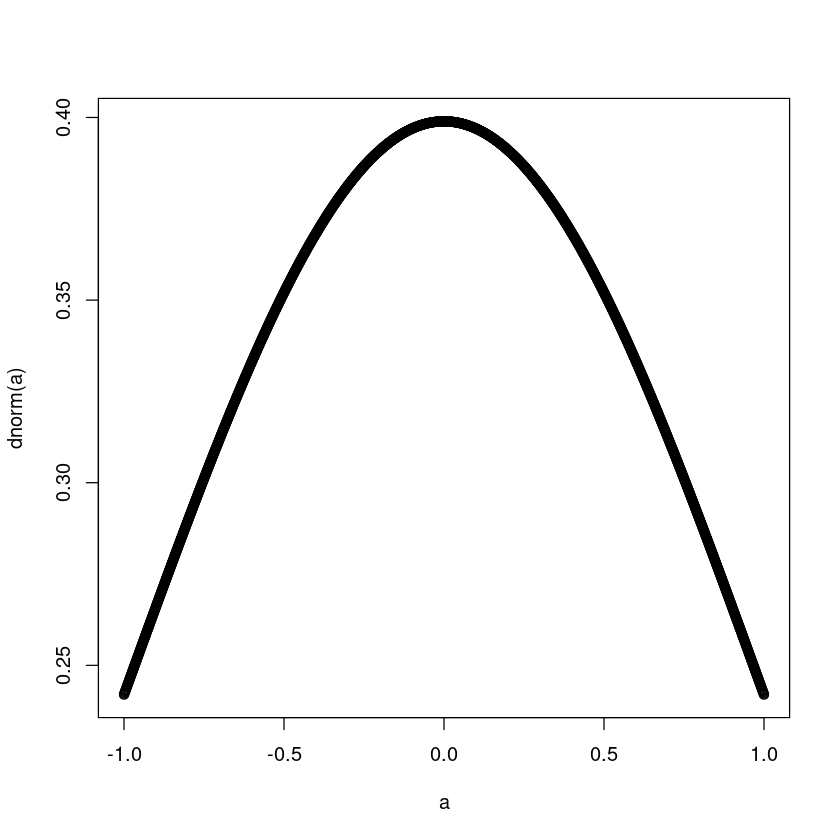

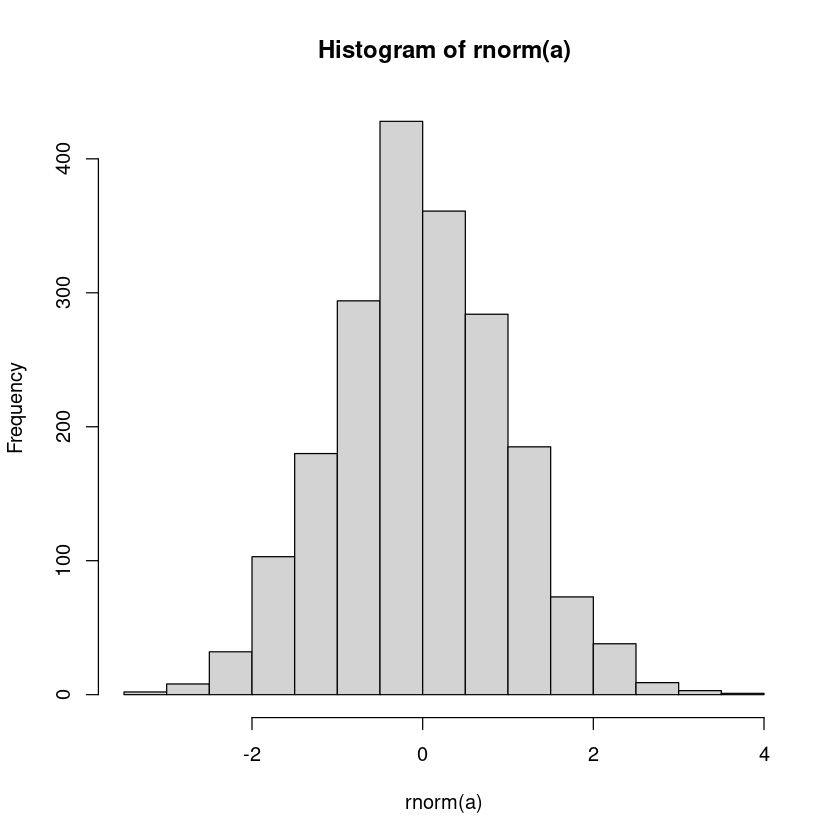

In [31]:
a<- seq(-1,1,0.001)
plot(a, dnorm(a))
# plot(a, pnorm(a))
hist(rnorm(a))
# plot(a, qnorm(a))


In [14]:
#probability of finishing in more than 75 min
cat("The probability of finihing in more than 75 mins is",integrate(Vectorize(f), lower=1.25, upper=2)$value,"\n")
cat("The probability of finihing in exactly 90 mins is",0,"\n")
cat("The probability of finihing in exactly 120 mins is",0)


The probability of finihing in more than 75 mins is 0.84375 
The probability of finihing in exactly 90 mins is 0 
The probability of finihing in exactly 120 mins is 0

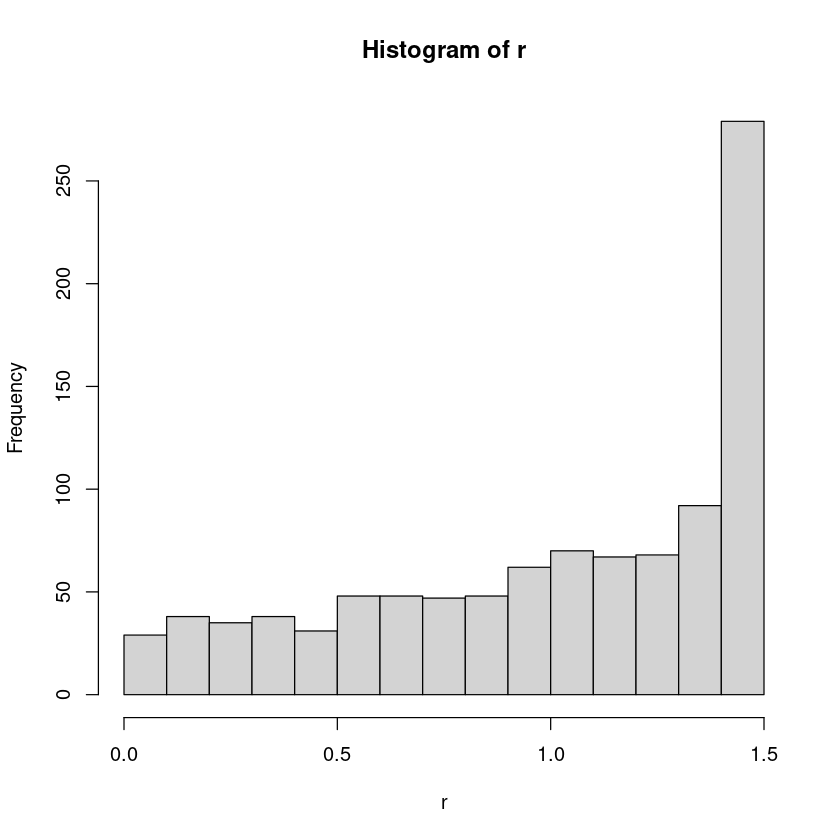

In [15]:
# r_function
r_function <- function(n){
    a <- seq(1,2,0.001)
    p <- vector()
    for(i in 1:n){
        p <- append(p, f(sample(a, size=1) ))
    }
    return(p)
}
r <- r_function(1000)
hist(r)

## es6

In [37]:
pdf_es6 <- function(x) {
    ifelse(
        x>1 & x<2,
        2/x^2,
        0
    )
}

cdf_es6 <- function(x) {
    ifelse(
        x>1 & x<2,
        - 2/x + 2 ,
        0
    )
} 
r_es6 <- function(n){
    a <- seq(1,2,0.001)
    p <- vector()
    for(i in 1:n){
        p <- append(p, life(sample(a, size=1) ))
    }
    return(p)
}

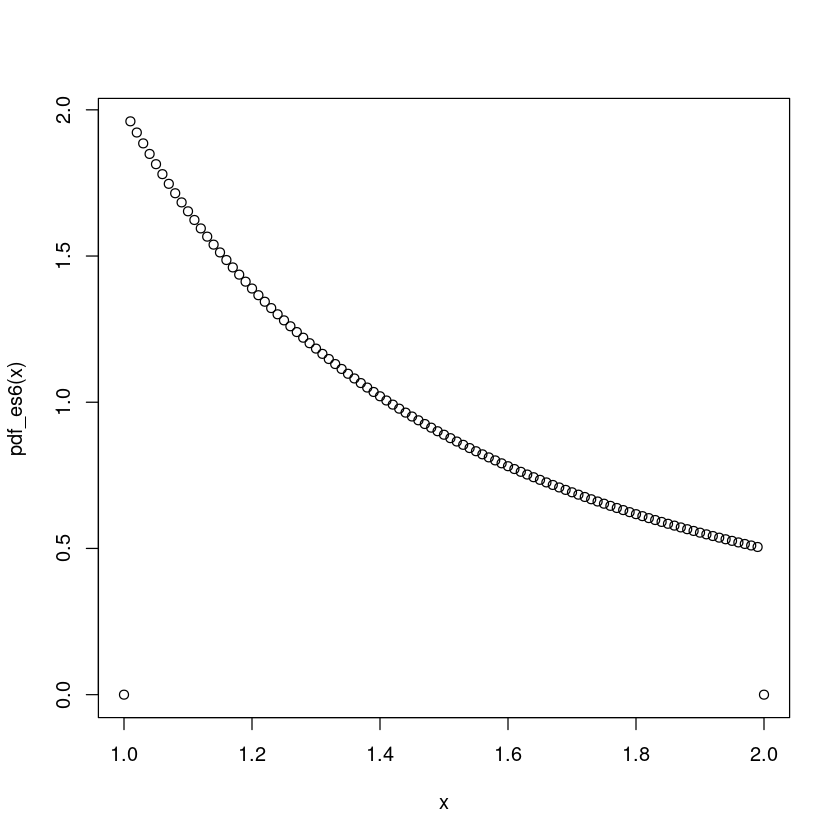

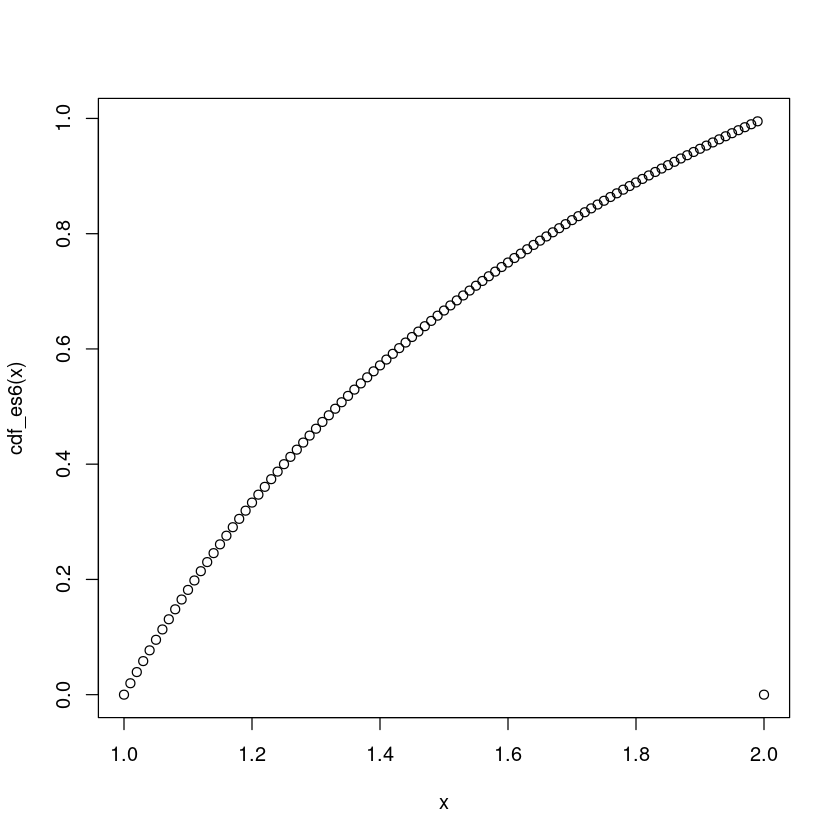

In [38]:
plot(x,pdf_es6(x))
plot(x,cdf_es6(x))
# hist(r_life(1000))


In [44]:
#probability x less than 1.5 => integrate from 1 to 1.5
Prob <- integrate(pdf_es6,1, 1.5)$value
Prob

[1] 0.6666667

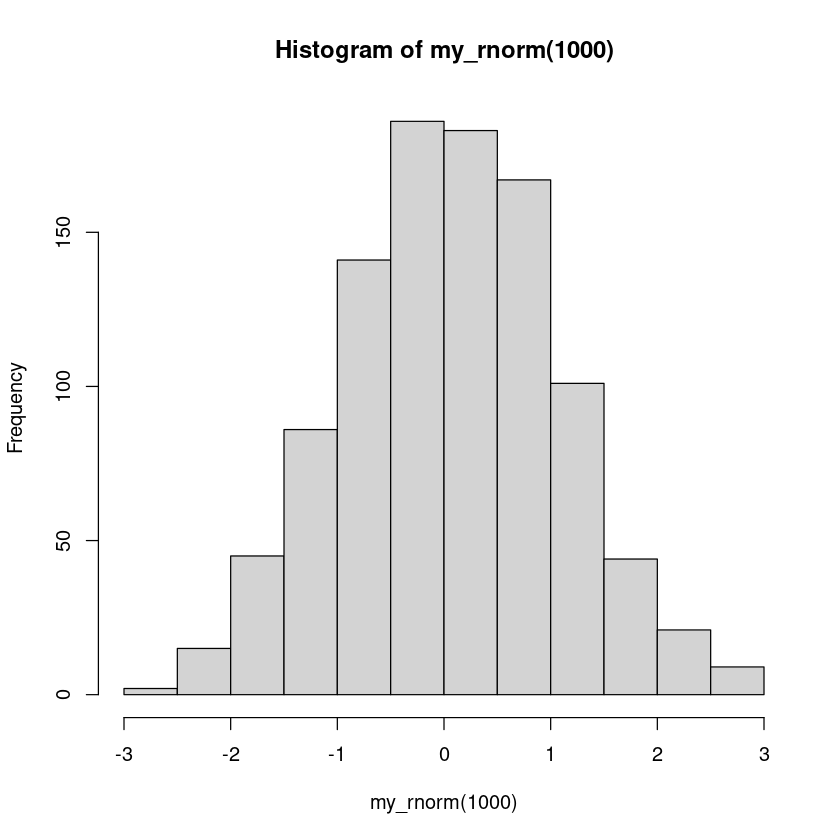

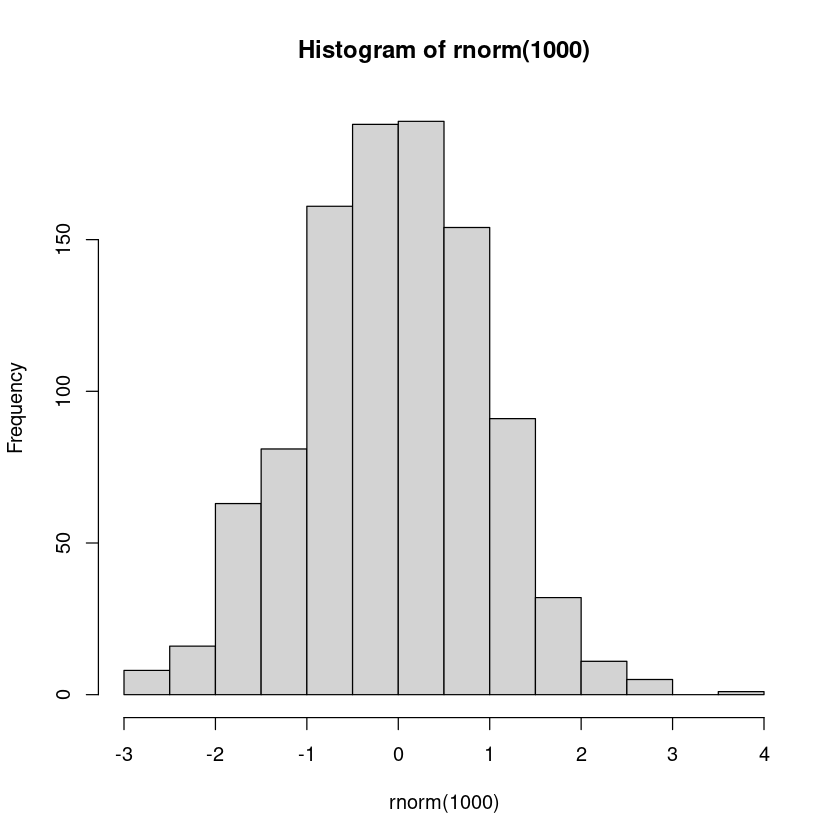

In [26]:
my_rnorm <- function(n){
    u <- runif(n)
    b <- Vectorize(qnorm)(u)
}
hist(my_rnorm(1000))
hist(rnorm(1000))